<a href="https://colab.research.google.com/github/shiernee/Advanced_ML/blob/main/Week2/WOA7015_Wk2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to WOA7015 Advance Machine Learning Lab - Week 2 
This code is generated for the purpose of WOA7015 module.
The code is available in github https://github.com/shiernee/Advanced_ML 


# The Gaussian Distribution

The p.d.f of random variable $Z$ with a gaussian / normal distribution is shown below

$$ p(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2 / 2}. $$

It is defined for all real values $z$, from $-\infty$ to $\infty$.

The distribution looks like this:

In [2]:
# import symbulate https://dlsun.github.io/symbulate/index.html 

!pip install -q symbulate
from symbulate import *

     |████████████████████████████████| 44 kB 2.1 MB/s 


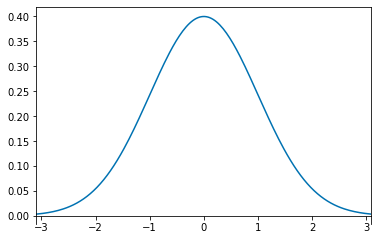

In [3]:
Normal().plot()

### Expected Value

The expected value of a standard normal random variable, $E[Z]$, is...


In [4]:
Normal().mean()

0.0

### Variance

The variance of a standard normal random variable, $\text{Var}[Z]$, is...

In [5]:
Normal().var()

1.0

## The (General) Normal Distribution

The standard normal distribution is centered at 0 with a variance of 1. In general, we can
- scale the bell shape to be as wide as we want, 
- shift the bell shape to be centered wherever we want.

If $Z$ is standard normal, then 
$$ X = \mu + \sigma Z $$
is $\text{Normal}(\mu, \sigma)$. The parameter $\mu$ is the expected value, and the parameter $\sigma$ is the standard deviation. (So $\sigma^2$ is the variance.)

## Exercise 1
Generate a normal distribution with 
1. mean=1, stdev=0.25
2. mean=1, stdev=0.5
3. mean=1, stdev=0.75
4. mean=3, stdev=0.25
5. mean=3, stdev=0.5
6. mean=3, stdev=0.75

in the same plot with different colors with legends.

In [6]:
# Your code here

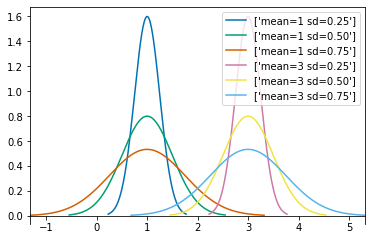

In [7]:
#@title ## Exercise 1 Solution - Try yourself first.

legend_list = []
for m in [1, 3]:
  for sd in [0.25, 0.5, 0.75]:
    Normal(mean=m, sd=sd).plot()
    legend_list.append(["mean=%d sd=%0.2f" %(m, sd)])


import matplotlib.pyplot as plt
plt.legend(legend_list)

# Probability

To calculate probabilities, we integrate the p.d.f. over the relevant region. For example,

$$ P(Z \leq 1) = \int_{-\infty}^1 \frac{1}{\sqrt{2\pi}} e^{-z^2 / 2}\,dz. $$

Unlike other continuous distributions we have studied, the p.d.f. $p(z)$ has no elementary antiderivative. That means that you will not be able to evaluate this integral by paper and pencil, using techniques you learned in calculus. It has to be evaluated numerically. Fortunately, you can do this easily in Symbulate. 

For example, $P(Z \leq 1)$ is just the c.d.f. evaluated at $1$. The c.d.f. of the standard normal distribution is often represented by $\Phi(z)$. So we need to calculate $\Phi(1)$.

In [8]:
Normal().cdf(1)

0.8413447460685429

## Exercise 2:
How would you calculate $P(-2 < Z < 2)$?

In [9]:
# YOUR CODE HERE


In [10]:
#@title Solution 2 - Try yourself first 
# P(-2 < Z < 2) = P(Z < 2) - P(Z < -2)

Normal().cdf([2]) - Normal().cdf([-2]) 


array([0.95449974])

# Monte Carlo Approximation 

## Example 1: Coin Flip Example

The probability of head for a fair coin is 1/2. Monte-Carlo method to simulate the coin-flipping iteratively 5000 times to find out why the probability of a head or tail is always 1/2. 

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week2/CoinFlip.png" width="256"/>

In [11]:
# import require libraries
import random
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# coin flip function:
# 0 --> Head
# 1 --> Tail

def coin_flip():
  return random.randint(0, 1)

# check the output of coin_flip
for i in range(10):
  print('iteration' + str(i) + '--> ' + str(coin_flip()))

iteration0--> 0
iteration1--> 1
iteration2--> 0
iteration3--> 1
iteration4--> 1
iteration5--> 0
iteration6--> 1
iteration7--> 1
iteration8--> 1
iteration9--> 0


In [13]:
# Monte Carlo Simulation
list1= []

def monte_carlo(n):
  results = 0
  plt.axhline(y=0.5, color='r', linestyle='-')

  for i in range(n):
    flip_result = coin_flip()
    results = results + flip_result

    # calculate probabibility valuue
    prob_value = results / (i+1)

    # append probability to list1
    list1.append(prob_value)

    # plot results    
    plt.xlabel('iteration')
    plt.ylabel('probability')
    plt.plot(list1)

  return results / n

final value of probability:  0.4995


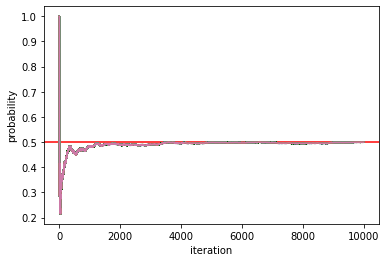

In [14]:
# call monte carlo functioiin
answer = monte_carlo(10000)
print('final value of probability: ', answer)

# Example 2: Estimating Pi from Circle and Square

To estimate the value of Pi, we can use the area of circle and square. 
$$ \frac{Area \ Circle}{Area \ Square} = \frac{\pi*r^2}{2r * 2r}  $$ <br>
$$ \frac{Area \ Circle}{Area \ Square} = \frac{\pi}{4}  $$ <br>

$\pi$ value can be estimate using the following formula
$$ \pi = 4* \frac{Area \ Circle}{Area \ Square} $$


<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week2/EstimatePiFromCircleSquare.png" width="256"> 

Assuming r = 0.5

length_of_field = 2r = 1.0


In [15]:
import turtle
from random import random 
import matplotlib.pyplot as plt
import math

In [16]:
# simulate raindrop 
# return x and y coordinates of raindrop

def rain_drop(length_of_field=1):
    """
    Simulate a random rain drop
    """
    return [(.5 - random()) * length_of_field, (.5 - random()) * length_of_field]


In [17]:
# check if raindrop fall in circle by using circle formula 

def is_point_in_circle(point, length_of_field=1):
    """
    Return True if point is in inscribed circle
    Use circle formula --> x^2 + y^2 <= r^2
    """
    return (point[0]) ** 2 + (point[1]) ** 2 <= (length_of_field / 2) ** 2

In [18]:
def plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field=1, format='pdf'):
    """ Function to draw rain drops """
    number_of_drops_in_circle = len(drops_in_circle)
    number_of_drops_out_of_circle = len(drops_out_of_circle)
    number_of_drops = number_of_drops_in_circle + number_of_drops_out_of_circle
    plt.figure()
    plt.xlim(-length_of_field / 2, length_of_field / 2)
    plt.ylim(-length_of_field / 2, length_of_field / 2)
    plt.scatter([e[0] for e in drops_in_circle], [e[1] for e in drops_in_circle], color='blue', label="Drops in circle")
    plt.scatter([e[0] for e in drops_out_of_circle], [e[1] for e in drops_out_of_circle], color='black', label="Drops out of circle")
    plt.legend(loc="center")
    plt.title("%s drops: %s landed in circle, estimating $\pi$ as %.4f." % (number_of_drops, number_of_drops_in_circle, 4 * number_of_drops_in_circle / number_of_drops))
    plt.savefig("%s_drops.%s" % (number_of_drops, format))


In [19]:
# simulate raindrop 
# return total number of raindrop in circle and in square

def rain(number_of_drops=1000, length_of_field=1, plot=True, format='pdf', dynamic=False):
    """
    Function to make rain drops.
    """
    number_of_drops_in_circle = 0
    drops_in_circle = []
    drops_out_of_circle = []
    pi_estimate = []
    for k in range(number_of_drops):
        d = (rain_drop(length_of_field))
        if is_point_in_circle(d, length_of_field):
            drops_in_circle.append(d)
            number_of_drops_in_circle += 1
        else:
            drops_out_of_circle.append(d)
        if dynamic:  # The dynamic option if set to True will plot every new drop (this can be used to create animations of the simulation)
            print("Plotting drop number: %s" % (k + 1))
            plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field, format)
        pi_estimate.append(4 * number_of_drops_in_circle / (k + 1))  # This updates the list with the newest estimate for pi.
    # Plot the pi estimates
    plt.figure()
    plt.scatter(range(1, number_of_drops + 1), pi_estimate)
    max_x = plt.xlim()[1]
    plt.hlines(math.pi, 0, max_x, color='black')
    plt.xlim(0, max_x)
    plt.title("$\pi$ estimate against number of rain drops")
    plt.xlabel("Number of rain drops")
    plt.ylabel("$\pi$")
    # plt.savefig("Pi_estimate_for_%s_drops_thrown.pdf" % number_of_drops)

    if plot and not dynamic:
        # If the plot option is passed and matplotlib is installed this plots
        # the final set of drops
        plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field, format)

    return [number_of_drops_in_circle, number_of_drops]


----------------------
10 drops
pi estimated as: 4.0 
----------------------


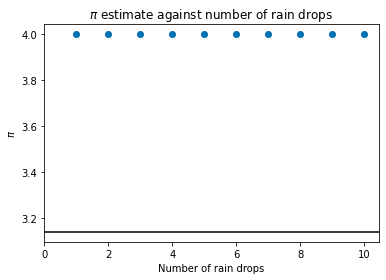

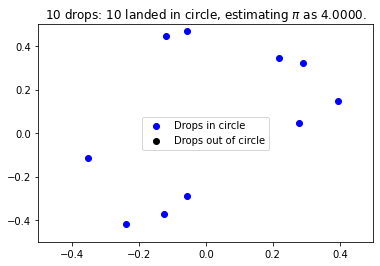

In [20]:
# call the function 
number_of_drops = 10
r = rain(number_of_drops, plot=True, format='png', dynamic=False)

print("----------------------")
print("%s drops" % number_of_drops)
print("pi estimated as: %s " % (4 * r[0] / r[1]))
print("----------------------")

## Now try increasing number_of_drops and check the value of $\pi$. 

## At what value of number_of_drops does the $\pi$ value approaches 3.14? Write down your answer below. 

In [21]:
# write your answer here. 


# ***Let's go back to power point - slide 11***

# Multivariate Gaussian Distribution

For two continuous random variables, plot type density uses the simulated $ (x,y)$  to estimate the joint probability density function and plot it.

### Example. Assume  <br>
mean of X = 1, mean of Y = 2 <br>
variance of X = 2, variance of Y = 4 <br>
covariance of xy and yx = 1

In [22]:
mu    = [1, 2]
Sigma = [[2, 1],
         [1, 4]]

X, Y = RV(MultivariateNormal(mean = mu, cov = Sigma))
Z = X + Y


In [23]:
# understand each output 

x = X.sim(10000)
y = Y.sim(10000)
z = Z.sim(10000)
print('X mean:', x.mean())
print('Y mean:', y.mean())
print('Z mean:', z.mean())
print('X variance:', x.sd()**2)
print('Y variance:', y.sd()**2)
print('Z variance:', z.sd()**2)


X mean: 1.0355354614639252
Y mean: 2.0301372213890025
Z mean: 3.0164924373913977
X variance: 1.926882702715538
Y variance: 3.963037048380013
Z variance: 7.998103342903985


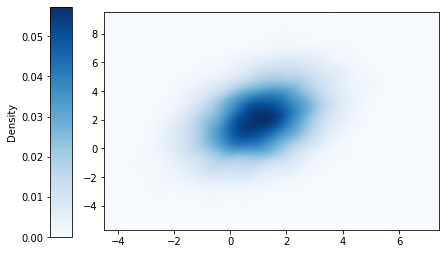

In [24]:
(X & Y).sim(10000).plot(type="density")

# Exercise 3  
Generate the Multivariate Gaussian as shown below given variance of X = 2, variance of Y = 4

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week2/Exercise3_Multivariate_Image.png" width="512"> 

In [25]:
# your code here

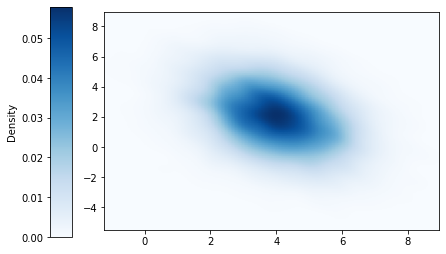

In [26]:
#@title Solution - Try yourself first
mu    = [4, 2]
Sigma = [[2, -1],
         [-1, 4]]

X, Y = RV(MultivariateNormal(mean = mu, cov = Sigma))
(X & Y).sim(10000).plot(type="density")

# ***Let's go back to power point - slide 20***

# Regularization 

Here we examine how regularizer in Ridge regression help in reducing overfitting. 

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error as mse


In [28]:
# generate 1d regression data 
def make_1dregression_data(n=21):
    np.random.seed(0)
    xtrain = np.linspace(0.0, 20, n)
    xtest = np.arange(0.0, 20, 0.1)
    sigma2 = 4
    w = np.array([-1.5, 1/9.])
    fun = lambda x: w[0]*x + w[1]*np.square(x)
    ytrain = fun(xtrain) + np.random.normal(0, 1, xtrain.shape) * \
        np.sqrt(sigma2)
    ytest= fun(xtest) + np.random.normal(0, 1, xtest.shape) * \
        np.sqrt(sigma2)
    return xtrain, ytrain, xtest, ytest


In [29]:
# split data into train and test
xtrain, ytrain, xtest, ytest = make_1dregression_data(n=21)

#Rescaling data
scaler = MinMaxScaler(feature_range=(-1, 1))
Xtrain = scaler.fit_transform(xtrain.reshape(-1, 1))
Xtest = scaler.transform(xtest.reshape(-1, 1))


In [30]:
# fit Ridge model with different regularizer strength
deg = 14
alphas = np.logspace(-10, 1.3, 10)  # Regularization strength
nalphas = len(alphas)
mse_train = np.empty(nalphas)
mse_test = np.empty(nalphas)
ytest_pred_stored = dict()


for i, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha, fit_intercept=False)
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    Xtrain_poly = poly_features.fit_transform(Xtrain)
    model.fit(Xtrain_poly, ytrain)
    ytrain_pred = model.predict(Xtrain_poly)
    Xtest_poly = poly_features.transform(Xtest)
    ytest_pred = model.predict(Xtest_poly)
    mse_train[i] = mse(ytrain_pred, ytrain) 
    mse_test[i] = mse(ytest_pred, ytest)
    ytest_pred_stored[alpha] = ytest_pred
    


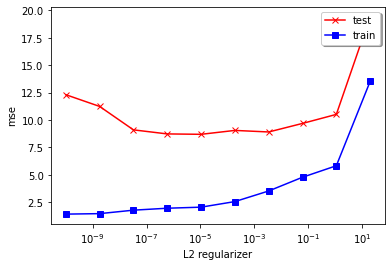

In [31]:
# Plot MSE vs degree
fig, ax = plt.subplots()
mask = [True]*nalphas
ax.plot(alphas[mask], mse_test[mask], color = 'r', marker = 'x',label='test')
ax.plot(alphas[mask], mse_train[mask], color='b', marker = 's', label='train')
ax.set_xscale('log')
ax.legend(loc='upper right', shadow=True)
plt.xlabel('L2 regularizer')
plt.ylabel('mse')
plt.show()


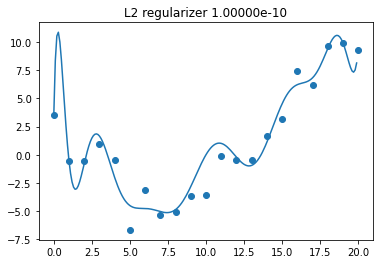

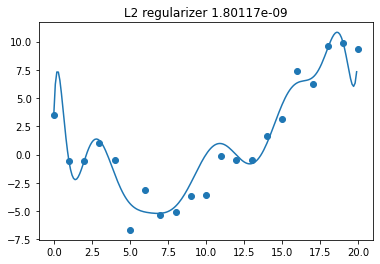

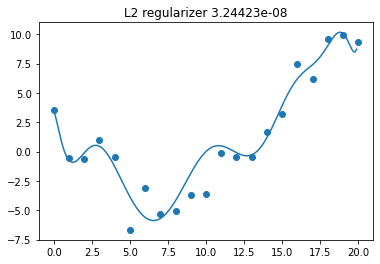

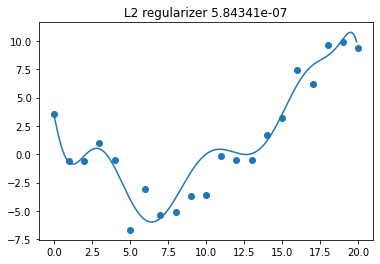

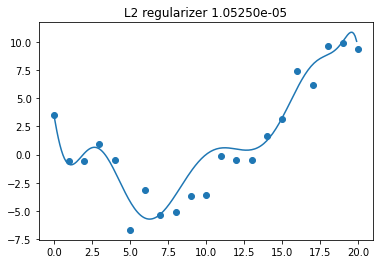

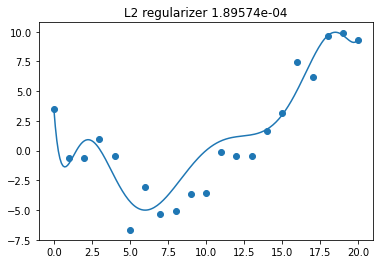

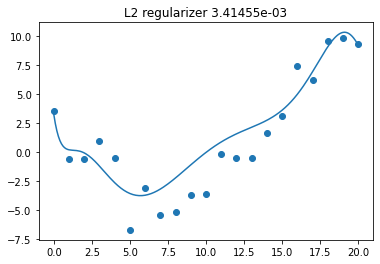

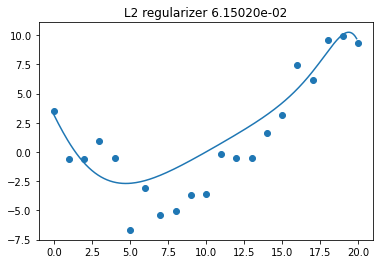

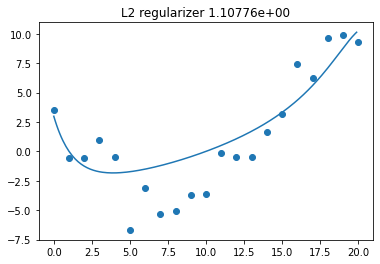

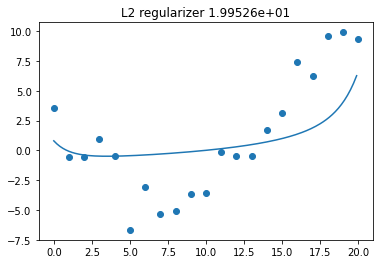

In [32]:
# Plot fitted functions
chosen_alphas = alphas[[0,5,8]]
for i, alpha in enumerate(alphas):
    fig, ax = plt.subplots()
    ax.scatter(xtrain, ytrain)
    ax.plot(xtest, ytest_pred_stored[alpha])
    plt.title('L2 regularizer {:0.5e}'.format(alpha))
    plt.show()

# Exercise 4: 
How do you choose what regularizer strength is optimal?? Explain your answer at the following cell. 

In [33]:
# your answer here


In [34]:
#@title Solution 

Use cross validation - explain the process

SyntaxError: ignored

# Exercise 5 (10%)

1. Load Iris Data from sklearn. Use the following code to import iris data 
```
from sklearn import datasets
iris = datasets.load_iris()
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
```
2. Use Sepal Length, Sepal Width, Petal Length as $X$ to estimate Petal Width ($Y$)

3. What is the best regularizer value for Ridge regression model? 

In [ ]:
# Your code here

# Submission Instructions
Once you are finished, follow these steps:

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells.
If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
Double check that there is a number next to each code cell and that these numbers are in order.
Then, submit your lab as follows:

Go to File > Print > Save as PDF.
Double check that the entire notebook, from beginning to end, is in this PDF file. Make sure Solution for Exercise 5 are in for marks. 
Upload the PDF to Spectrum. 

# Acknowledgement

The works are inspired from 
1. Normal Distribtion - https://colab.research.google.com/github/dlsun/Stat350F19/blob/master/Normal_Distribution.ipynb#scrollTo=4K2s06RQFP_1 
2. Coin Flip Example - https://pub.towardsai.net/monte-carlo-simulation-an-in-depth-tutorial-with-python-bcf6eb7856c8 
3. Estimating $\pi$ from circle and square = https://www.youtube.com/watch?v=VJTFfIqO4TU 